In [1]:
import tweepy
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
import collections

In [2]:
#helping set up the plot background
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [3]:
# Step 1 - Authenticate
consumer_key = 'fWBQJWnNTqPyOw4uEVU315MxB'
consumer_secret = 'Ci6vbxzOsQ9Cwr1X5PuDyQ9aQNRylPfg4JRCSCMMDOgtQ85PBT'

access_token = '1050046371737296896-eB8yZPHSEFRflTCPFJpLeGWiL35Vpg'
access_token_secret = 'ecc3Rk2Fd891VSyZv4Ba2ZKzwF9Wsa2i7RkMRV5c7NZb6'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)


In [4]:
# Step 3 - Retrieve Tweets
public_tweets = api.search('Trump')

# Step 4 - print the tweets, for fun to go through them.
for tweet in public_tweets:
    print(tweet.text)

    # Step 4 Perform Sentiment Analysis on Tweets
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)
    print("")

RT @RSBNetwork: President Trump sends a message to the Canadian truckers: "We are with them all the way!" https://t.co/6DKHvOsGzo
Sentiment(polarity=0.0, subjectivity=0.0)

RT @catfishyak: I can’t believe that Fulton County has had to ask for help from the FBI after Trump called for violence if he’s indicted. W…
Sentiment(polarity=0.0, subjectivity=0.0)

RT @tribelaw: “Former President Donald Trump on Sunday admitted in a written statement that he wanted his former Vice President Mike Pence…
Sentiment(polarity=0.0, subjectivity=0.0)

RT @STPFreak: I'm really not in the mood for any of that Merrick Garland is doing his job crapola today as Trump riles up his cult mob.…
Sentiment(polarity=-0.1, subjectivity=0.2)

RT @tribelaw: He’s daring AG Garland to do his duty. I know Merrick Garland well enough to say: Trump’s is the dumbest strategy imaginable.
Sentiment(polarity=0.0, subjectivity=0.5)

RT @tribelaw: He’s daring AG Garland to do his duty. I know Merrick Garland well enough to say: 

In [5]:
#Create your list of all the tweet texts
all_tweets = [tweet.text for tweet in public_tweets]
#['I like Joe', 'I voted']
# List of all words across tweets

In [6]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets]
#[['i', 'like','joe'], ['i', 'voted']]

In [7]:
all_words = list(itertools.chain(*words_in_tweet))
#['i','like','joe','i','voted']

In [8]:
# Create counter
counts_words = collections.Counter(all_words)
print(counts_words.most_common(15))

words_tweets = pd.DataFrame(counts_words.most_common(15),
                             columns=['words', 'count'])

print(words_tweets.head())

[('rt', 15), ('the', 12), ('to', 10), ('trump', 8), ('a', 7), ('that', 6), ('his', 6), ('for', 5), ('he’s', 5), ('garland', 5), ('i', 4), ('he', 4), ('of', 4), ('is', 4), ('do', 4)]
   words  count
0     rt     15
1    the     12
2     to     10
3  trump      8
4      a      7


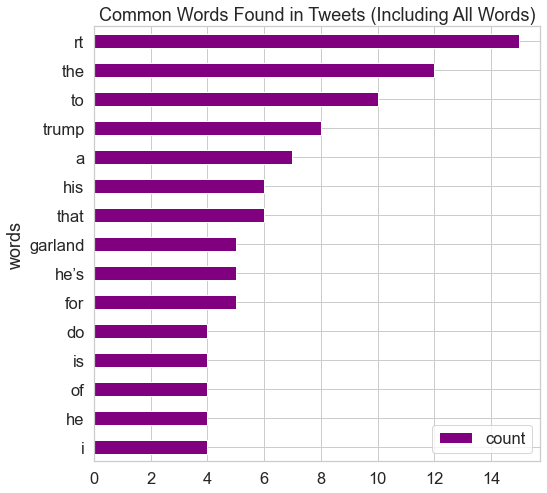

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
words_tweets.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()